In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1 : Integration: Trapezoid and Midpoint ####


The exact value of the integral is 2.328423e-01
With 50 partitions:
The midpoint estimate is 2.327178e-01
The Trapezoid estimate is 2.334008e-01


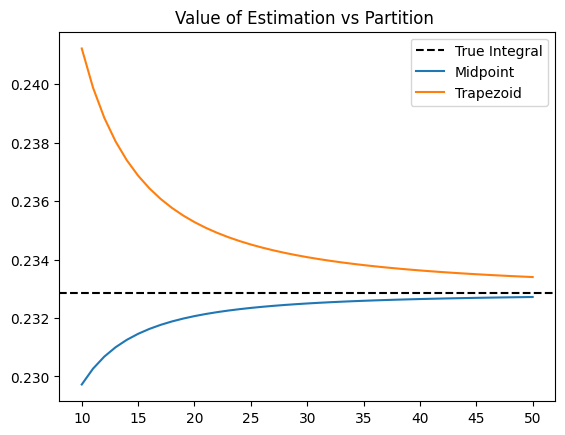

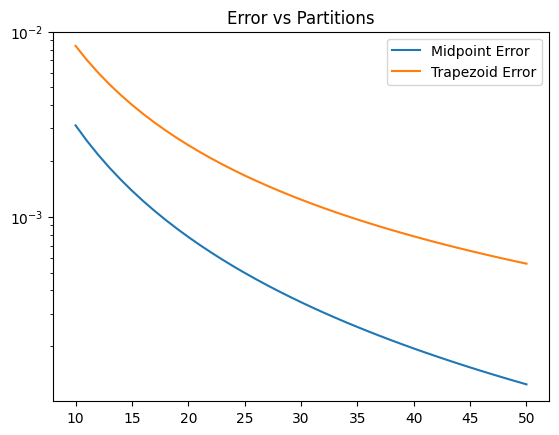

In [75]:
def f(x):
    return np.cos(2*x)*np.exp(-3*x)

def midpoint(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    sum = 0
    x = np.linspace(a, b, n+1)
    # h = x[1]-x[0]
    h = (b-a)/n

    for i in range(n):
        sum += f((x[i]+x[i+1]) / 2)

    return sum * h

def trapezoid(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    x = np.linspace(a, b, n+1)
    sum = f(x[0])+f(x[-1])
    h = (b-a)/n

    for i in range(1,n-1):
        sum += 2*f((x[i]))
    
    return (h/2)*sum 

def partvsval(Iestimator):
    numParts = np.linspace(10,50, 41)
    estimates = []

    for bins in range(10,51):
        estimates.append(Iestimator(f, bins, 0, np.pi/2))

    return (numParts, estimates)


exactI = (3/13)*(1+np.exp(-3*np.pi/2))

midData = partvsval(midpoint)
trapData = partvsval(trapezoid)

bins = midData[0]

print(f'The exact value of the integral is {exactI:.6e}')
print(f'With {bins[-1]:.0f} partitions:')
print(f'The midpoint estimate is {midData[1][-1]:.6e}')
print(f'The Trapezoid estimate is {trapData[1][-1]:.6e}')



plt.axhline(y = exactI, label = 'True Integral', color = 'black', linestyle = 'dashed')
plt.plot(midData[0], midData[1], label = 'Midpoint')
plt.plot(trapData[0], trapData[1], label = 'Trapezoid')
plt.title('Value of Estimation vs Partition ')
plt.legend()
plt.show()
# # estI = midpoint(f, 10, 0, np.pi/2)

midPointErr = []
trapErr = []

for i in range(len(midData[1])):
    midPointErr.append(abs(exactI-midData[1][i]))
    trapErr.append(abs(exactI - trapData[1][i]))

plt.semilogy(bins, midPointErr, label= 'Midpoint Error')
plt.semilogy(bins, trapErr, label = 'Trapezoid Error')
plt.ylim(top = 1e-2)
plt.title('Error vs Partitions')
plt.legend()
plt.show()